# Bombardeos de los Aliados,
### y de cómo entender mejor la Segunda Guerra Mundial a través de ellos.
By Fernando Bielza González

## >Importa librerías necesarias

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins #<--- Para lo del minimapa

import copy
import random
import statistics #<--- Para las medianas

from geopy.distance import geodesic #<--- Para las distancias


from pandas.plotting import table  #<--- Para guardar tablas como imágenes


## >Obtener el DataFrame THOR y una copia (DataFrame General)

In [2]:
df = pd.read_csv('Datasets/thor_wwii.csv')
df_total=copy.copy(df)
df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,NaN,BLENHEIM,NaN,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


## >Arreglar DataFrame General

### +Arreglar datos NaN de interés

In [3]:
df_total["THEATER"]=df_total["THEATER"].fillna("UNKNOWN THEATER")
df_total["COUNTRY_FLYING_MISSION"]=df_total["COUNTRY_FLYING_MISSION"].fillna("UNKNOWN COUNTRY")
df_total["NAF"]=df_total["NAF"].fillna("UNKNOWN NAF")
df_total["UNIT_ID"]=df_total["UNIT_ID"].fillna("UNKNOWN UNIT")
df_total["AIRCRAFT_NAME"]=df_total["AIRCRAFT_NAME"].fillna("UNKNOWN NAME")

df_total["AC_ATTACKING"]=df_total["AC_ATTACKING"].fillna(0.0)

df_total["TGT_COUNTRY"]=df_total["TGT_COUNTRY"].fillna("UNKNOWN COUNTRY")
df_total["TGT_LOCATION"]=df_total["TGT_LOCATION"].fillna("UNKNOWN LOCATION")      #<---¿UNIDENTIFIED?

### +Arreglar ausencia de coordenadas en las operaciones sobre Madagascar

In [4]:
#Obtener el índice de todas las filas cuyo país registrado sea Madagascar:
x=df_total[df_total["TGT_COUNTRY"]=="MADAGASCAR"]
lista_Madagascar=x.index.tolist()

#Obtener un nuevo DataFrame con las filas de Madagascar y añadirle las coordenadas de forma manual:
a=df_total[df_total["TGT_LOCATION"]=="DIEGO SUAREZ BAY"]
a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)

b=df_total[df_total["TGT_LOCATION"]=="SW OF DIEGO SUAREZ BAY"]
b['TGT_LATITUDE'] = b['TGT_LATITUDE'].fillna(-12.1350)
b['TGT_LONGITUDE'] = b['TGT_LONGITUDE'].fillna(49.1734)

c=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRDGE TO TANANARIVE"]
c['TGT_LATITUDE'] = c['TGT_LATITUDE'].fillna(-16.9380)
c['TGT_LONGITUDE'] = c['TGT_LONGITUDE'].fillna(46.9512)

d=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRIDGE"]
d['TGT_LATITUDE'] = d['TGT_LATITUDE'].fillna(-16.9380)
d['TGT_LONGITUDE'] = d['TGT_LONGITUDE'].fillna(46.9512)

e=df_total[df_total["TGT_LOCATION"]=="3MI N OF BEHENJY ON TANANARIVE-ANTISIRABE RD"]
e['TGT_LATITUDE'] = e['TGT_LATITUDE'].fillna(-16.9380)
e['TGT_LONGITUDE'] = e['TGT_LONGITUDE'].fillna(46.9512)

f=df_total[df_total["TGT_LOCATION"]=="IHOSY"]
f['TGT_LATITUDE'] = f['TGT_LATITUDE'].fillna(-22.2400)
f['TGT_LONGITUDE'] = f['TGT_LONGITUDE'].fillna(46.0701)

g=df_total[df_total["TGT_LOCATION"]=="1 MI SW OF IHOSY"]
g['TGT_LATITUDE'] = g['TGT_LATITUDE'].fillna(-22.2400)
g['TGT_LONGITUDE'] = g['TGT_LONGITUDE'].fillna(46.0701)

h=df_total[df_total["TGT_LOCATION"]=="HILLS S OF AMBOSITRA"]
h['TGT_LATITUDE'] = h['TGT_LATITUDE'].fillna(-20.3258) 
h['TGT_LONGITUDE'] = h['TGT_LONGITUDE'].fillna(47.1521)

ii=df_total[df_total["TGT_LOCATION"]=="N OF ALAKAMISY"]
ii['TGT_LATITUDE'] = ii['TGT_LATITUDE'].fillna(-19.53)  
ii['TGT_LONGITUDE'] = ii['TGT_LONGITUDE'].fillna(46.54)

j=df_total[df_total["TGT_LOCATION"]=="ARRACHART AIRFIELD"]
j['TGT_LATITUDE'] = j['TGT_LATITUDE'].fillna(-12.2057)
j['TGT_LONGITUDE'] = j['TGT_LONGITUDE'].fillna(49.1730)

k=df_total[df_total["TGT_LOCATION"]=="COL DE BONNE NOUVELLE"]
k['TGT_LATITUDE'] = k['TGT_LATITUDE'].fillna(-18.5619)
k['TGT_LONGITUDE'] = k['TGT_LONGITUDE'].fillna(47.3117)

#Este caso no se trata de coordenadas ausentes, sino de una erróena asignación de país:
l=df_total[df_total["TGT_LOCATION"]=="BALDENEY SEE"]
l["TGT_COUNTRY"] = l["TGT_COUNTRY"].replace(["MADAGASCAR"], "GERMANY")

##Este último se trata de coordenadas objetivamente erradas (se salen del mapamundis):
m=df_total[df_total["TGT_LOCATION"]=="PAUILLAC"]
m['TGT_LATITUDE'] = m['TGT_LATITUDE'].replace([100.65], 45.1200)
m['TGT_LONGITUDE'] = m['TGT_LONGITUDE'].replace([1000.65], -0.748611)

#Cambiar valor del "Super Bombardeo de Kassala" (el cual, con toda seguridad, es erróeno, por lo que lo reduzco un 1000%)
n=df_total[178278:178279]
n['TOTAL_TONS'] = n['TOTAL_TONS'].replace([4750.0], 47.0)

#Añadimos esto último (que nada tiene que ver con Madagascar, pero hay que rectificarlos igualmente):
lista_Madagascar_2=m.index.tolist()
for i in lista_Madagascar_2:
    lista_Madagascar.append(i)

#Concatenar todas las filas en un único DataFrame:
df_total_Madagascar = pd.concat([a, b, c, d, e, f, g, h, ii, j, k, l, m])

#Expulsar del DataFrame General todas las operaciones a arreglar:
for i in lista_Madagascar:
    df_total=df_total.drop([i])

#Concatenar el DataFrame General con el DataFrame de las operaciones sobre Madagascar (ya con las coordenadas añadidas):
df_total=pd.concat([df_total, df_total_Madagascar])


C:\Users\ferbi\AppData\Local\Temp/ipykernel_41252/3564580759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_41252/3564580759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_41252/3564580759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### +Arreglar cronología y eliminar fechas sobrantes (todas las posteriores al 2 de septiembre de 1945)

In [5]:
#Obtener DataFrame General ordenado cronológicamente:
df_total["MSNDATE"]=pd.to_datetime(df_total["MSNDATE"])
df_total=df_total.sort_values(by='MSNDATE')

#Obtener DataFrame con las fechas posteriores al 2 de septiembre de 1945 de forma manual:
df_total_END=df_total[-53:]

#Eliminar fechas sobrantes del DataFram General:
df_total=df_total[:-54]
#(hay 178.227 (-54) operaciones)

### +Arreglar índice, cambiándolo por las fechas

In [6]:
df_total.set_index('MSNDATE',inplace=True)

## >Funiones

### +Función para localizar por días

In [7]:
#Función para obtener las filas que se encuentren comprendidas en los índices (fechas) indicadas en el argumento:
def fun_fechas (df_total_dias, *fechas):
    lista=[]
    for i in fechas:
        lista.append(i)
    if len(lista) < 2:
        lista.append(lista[0])
    return df_total_dias[lista[0]:lista[1]]

### +Función para obtener número de operaciones

In [8]:
#Función para cronología [muestra solo Fecha]:
def fun_crono (df_total_year, x=5, y=5, titulo="Bombardeos Aliados en la Segunda Guerra Mundial", style=0, kind=1, save="0"):
    df_crono=df_total_year.drop(['COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME', 'TGT_LATITUDE', 'TGT_LONGITUDE', 'TOTAL_TONS'], axis=1)
    lista_crono=[]
    for (index, row) in df_crono.iterrows():
        fecha=index
        lista_crono.append(fecha)
    df_fechas = pd.Series(lista_crono, index = lista_crono)
    titulo_1=limpiar_horas(lista_crono[0])
    titulo_2=limpiar_horas(lista_crono[-1])
    
    plt.style.use(estilo (style))
    
    r=df_fechas.groupby([df_fechas.dt.year, df_fechas.dt.month]).count().plot(kind=(tipo(kind)), title=titulo, xlabel=f"De {titulo_1} a {titulo_2}", ylabel="Nº Operaciones", figsize=(x,y), edgecolor='black')
    
    if save!="0":
        return plt.savefig(f"{save}")
    return r

### +Función para obtener la suma de cada columna, agrupado en torno al Nombre de Avión y a País

In [9]:
#Función para sacar un dataframe que muestra el total de toneladas arrojadas por un modelo de avión, según el país:
def fun_avion_pais (df_total_year, ascendente=False):
    df_avion_pais=df_total_year.groupby(by=['AIRCRAFT_NAME','COUNTRY_FLYING_MISSION']).sum().groupby(level=[0]).cumsum()
    print ("Bombardeo total: ", round(df_avion_pais["TOTAL_TONS"].sum()), "toneladas")
    if ascendente is True:
        return (df_avion_pais.sort_values ("TOTAL_TONS", ascending=False))["TOTAL_TONS"]
    return df_avion_pais["TOTAL_TONS"]

### +Función para geolocalizar

#### · Funciones de geolocalización

In [10]:
def fun_gps(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=5, reverse=False, minimapa=False, escala=False, save="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.1, 0.1), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.15, 0.15), 6))
            if reverse is True:
                referencia_x=atacante
                atacante=referencia
                referencia=referencia_x
            folium.Marker(location = [m, n], popup = atacante, tooltip = referencia, icon=folium.Icon(color=x, icon=y),).add_to(r)
        else:
            pass
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

In [11]:
def fun_gps2(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=5, minimapa=False, multiplicador=5, escala=False, save="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.1, 0.1), 9))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.1, 0.1), 9))
            total_tons=((row.loc['TOTAL_TONS'])+1)*multiplicador
            folium.Circle(radius=total_tons, location=[m, n], popup = atacante, tooltip = referencia, color=x, fill=True, ).add_to(r)
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

In [12]:
def fun_gps_camino (df_total_year, version=False, x=5, y=53.5, z=5.5, minimapa=False, escala=False, save="0"):
    r = folium.Map(location=[y, x], zoom_start=z)
    lista_camino=[]
    df_total_year=df_total_year.dropna()
    for (index, row) in df_total_year.iterrows():
        m=[row.loc['TAKEOFF_LATITUDE'], row.loc['TAKEOFF_LONGITUDE']]
        n=[(row.loc['TGT_LATITUDE']+(round(random.uniform(-0.03, 0.03), 6))), (row.loc['TGT_LONGITUDE']+(round(random.uniform(-0.03, 0.03), 6)))]
        x=[m, n]
        distancia=round(geodesic(m, n).km), 3
        referencia="Origen: "+row.loc["TAKEOFF_BASE"]+" ("+row.loc["TAKEOFF_COUNTRY"]+")"+" / "+"Destino: "+row.loc["TGT_LOCATION"]
        lista_camino.append(x)
        if version is not False:
            plugins.AntPath(lista_camino, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r)
        else:
            folium.PolyLine(lista_camino, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r)
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

#### · Funciones que ayudan a la función de geolocalización

In [13]:
#Función para colorear los iconos de la función de geolocalizar:
def colorear (color):
    if color >= 1000:
        return "black"
    elif color >= 900:
        return "gray"
    elif color >= 800:
        return "cadetblue"
    elif color >= 700:
        return "darkblue"
    elif color >= 600:
        return "darkpurple"
    elif color >= 500:
        return "blue"
    elif color >= 400:
        return "purple"
    elif color >= 300:
        return "orange"
    elif color >= 200:
        return "red"
    elif color >= 100:
        return "darkred"
    elif color >= 80:
        return "darkgreen"
    elif color >= 50:
        return "green"
    elif color >= 30:
        return "lightgray"
    elif color >= 24:
        return "pink"
    elif color >= 17:
        return "lightred"
    elif color >= 10:
        return "beige"
    elif color >= 5:
        return "lightblue"
    elif color > 0:
        return "lightgreen"
    else:
        return "white"


#Función para establecer el símbolo de los iconos de la función de geolocalizar:
def simbolo (pais):
    if pais == "USA":
        return "star"
    elif pais == "GREAT BRITAIN":
        return "gbp"
    elif pais == "NEW ZEALAND":
        return "leaf"
    elif pais == "AUSTRALIA":
        return "font"
    elif pais == "SOUTH AFRICA":
        return "certificate"
    else:
        return "question-sign"


#Función para eliminar tanto las horas, como los minutos, como los segundos del marcador de los iconos:
def limpiar_horas (fecha):
    s=str(fecha)
    i="00:"
    s = s.replace(i,"")
    i="00"
    s = s.replace(i,"")
    return s

### +Función de tarta para Modelos de Avión más frecuentes

In [14]:
#Función para obtener los Modelos de Avión más frecuentes [muestra solo Modelo de Avión]:
def fun_modelos_avion (df_total_year, x=8, y=8, top=0, circulo=False, style=11, save="0"):
    df_total_aviones=df_total_year["AIRCRAFT_NAME"].value_counts()
    plt.style.use(estilo (style))
    if top !=0:
        df_total_aviones_less= df_total_aviones[(top):]
        c=0
        for i in df_total_aviones_less:
            c=i+c
        df_total_aviones_less=pd.Series([c],index=[f"Resto [{len(df_total_aviones_less.index)}]"])
        df_total_aviones_max= df_total_aviones[:(top)]
        df_total_aviones=pd.concat([df_total_aviones_max, df_total_aviones_less])
    plt.figure(figsize=(x,y))
    plt.pie(df_total_aviones.values, labels=df_total_aviones.index, autopct='%1.2f%%', frame=False, colors= ("cadetblue","blue","darkblue","green","purple","black","red","darkgreen","orange","pink","lightgray","darkred","beige","lightblue","lightgreen","white"))
   
    p=plt.gcf()
    if circulo is True:
        my_circle=plt.Circle((0,0), 0.7, color="w")
        p.gca().add_artist(my_circle)
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Función de barras e información según Modelo de Avión

#### · Función según Modelo de Avión más o menos frecuentes

In [15]:
def fun_uso_aviones (df_total_year, x=5, y=5, top=72, low=0, tons=0, comparacion=False, info=False, extra=False, media=False, save="0"):
    w=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    df_total_year=w
    if low>0:
        low=-low
    if media is True:
        c=df_total_year.groupby(['AIRCRAFT_NAME']).mean()
        c=(c.sort_values('TOTAL_TONS', ascending=False))
        m=c.index
    else:
        c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
        c=c["AIRCRAFT_NAME"].value_counts()
        m=c.index
    aviones=[]
    lista_bombardeos=[]
    lista_destruccion=[]
    lista_media=[]
    lista_teatros=[]
    lista_media_total=[]
    lista_media_grupo=[]
    lista_nagasaki=[]
    for i in m:
        aviones.append(i)
    aviones=aviones[(low):(top)]
    if "UNKNOWN NAME" in aviones:
            aviones.remove("UNKNOWN NAME")
    for i in aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        bombardeos=len(df_avion)
        lista_bombardeos.append(bombardeos)
        pais=df_avion["COUNTRY_FLYING_MISSION"].value_counts()
        if "UNKNOWN COUNTRY" in pais.index:
            pais=pais.drop("UNKNOWN COUNTRY")
        teatros=df_avion["THEATER"].value_counts()
        if "UNKNOWN THEATER" in teatros:
            teatros=teatros.drop("UNKNOWN THEATER")
        media_teatros=round((100/bombardeos)*teatros[0], 2)
        lista_teatros.append(media_teatros)
        destruccion=round(sum(df_avion["TOTAL_TONS"]), 3)
        lista_destruccion.append(destruccion)
        nagasaki=round((destruccion/20000), 3)
        lista_nagasaki.append(nagasaki)
        media=round((destruccion/len(df_avion)), 3)
        lista_media.append(media)
        if info is True:
            if comparacion == True:
                r= f"(unas {nagasaki} nagasakis)"
                rr=f"({media_teatros}% de su total)"
            else:
                r=""
                rr=""
            print("Nombre del Modelo:", i)
            print("·Pais más común:", (pais.index[0]))
            print("·Teatro más común:", (teatros.index[0]), rr)
            print("·Número de Bombardeos:", bombardeos)
            print("·Toneladas Arrojadas:", destruccion, r)
            print("·Media de Toneladas Arrojadas:", media, "\n")
    
    if len(aviones)>10:
        aviones=aviones[:10]
        lista_bombardeos=lista_bombardeos[:10]
        lista_destruccion=lista_destruccion[:10]
        lista_media=lista_media[:10]
        lista_teatros=lista_teatros[:10]
        lista_nagasaki=lista_nagasaki[:10]
    
    for i in lista_destruccion:
        t=round((100/sum(lista_destruccion)*i), 3)
        tt=round((100/(round(sum(df_total_year["TOTAL_TONS"]), 3))*i), 3)
        ttt=round((100/(round(sum(df_total["TOTAL_TONS"]), 3))*i), 3)
        lista_media_grupo.append(t)
        lista_media_total.append(ttt)
    
    if extra is True:
        n=6
    else:
        n=3
    
    fig,ax=plt.subplots(n,1, figsize=(x,y))
    ax[0].bar(aviones,lista_bombardeos,color="blue", edgecolor='black')
    ax[0].legend(["Número de Bombardeos:"])
    ax[1].bar(aviones,lista_destruccion,color="red", edgecolor='black')
    ax[1].legend(["Toneladas Arrojadas:"])
    ax[2].bar(aviones,lista_media,color="green", edgecolor='black')
    ax[2].legend(["Media de Toneladas Arrojadas:"])
    if extra is True:
        ax[3].bar(aviones,lista_media_grupo,color="yellow", edgecolor='black')
        ax[3].legend(["Porcentaje de Toneladas Arrojadas (sobre el Grupo):"])
        ax[4].bar(aviones,lista_media_total,color="white", edgecolor='black')
        ax[4].legend(["Porcentaje de Toneladas Arrojadas (sobre el Total):"])
        ax[5].bar(aviones,lista_nagasaki,color="black", edgecolor='black')
        ax[5].legend(["Proporcion con respecto al bombardeo de Nagasaki:"])
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función según Modelos de Avión específicos

In [16]:
def fun_uso_avion (df_total_year, *aviones, x=5, y=5, comparacion=False, info=False, info_modelos=False, extra=False, save="0"):
    if info_modelos is True:
        return (df_total["AIRCRAFT_NAME"].value_counts()).index
    lista_aviones=[]
    for i in aviones:
        i=i.upper()
        lista_aviones.append(i)
    lista_bombardeos=[]
    lista_destruccion=[]
    lista_media=[]
    lista_teatros=[]
    lista_media_total=[]
    lista_media_grupo=[]
    lista_nagasaki=[]
    for i in lista_aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        bombardeos=len(df_avion)
        lista_bombardeos.append(bombardeos)
        pais=df_avion["COUNTRY_FLYING_MISSION"].value_counts()
        if "UNKNOWN COUNTRY" in pais.index:
            pais=pais.drop("UNKNOWN COUNTRY")
        teatros=df_avion["THEATER"].value_counts()
        if "UNKNOWN THEATER" in teatros:
            teatros=teatros.drop("UNKNOWN THEATER")
        media_teatros=round((100/bombardeos)*teatros[0], 2)
        lista_teatros.append(media_teatros)
        destruccion=round(sum(df_avion["TOTAL_TONS"]), 3)
        lista_destruccion.append(destruccion)
        nagasaki=round((destruccion/20000), 3)
        lista_nagasaki.append(nagasaki)
        media=round((destruccion/len(df_avion)), 3)
        lista_media.append(media)
        if info is True:
            if comparacion == True:
                r= f"(unas {nagasaki} nagasakis)"
                rr=f"({media_teatros}% de su total)"
            else:
                r=""
                rr=""
            print("Nombre del Modelo:", i)
            print("·Pais más común:", (pais.index[0]))
            print("·Teatro más común:", (teatros.index[0]), rr)
            print("·Número de Bombardeos:", bombardeos)
            print("·Toneladas Arrojadas:", destruccion, r)
            print("·Media de Toneladas Arrojadas:", media, "\n")
    
    for i in lista_destruccion:
        t=round((100/sum(lista_destruccion)*i), 3)
        tt=round((100/(round(sum(df_total_year["TOTAL_TONS"]), 3))*i), 3)
        ttt=round((100/(round(sum(df_total["TOTAL_TONS"]), 3))*i), 3)
        lista_media_grupo.append(t)
        lista_media_total.append(ttt)
    
    if extra is True:
        n=6
    else:
        n=3
    
    fig,ax=plt.subplots(n,1, figsize=(x,y))
    ax[0].bar(lista_aviones,lista_bombardeos,color="blue", edgecolor='black')
    ax[0].legend(["Número de Bombardeos:"])
    ax[1].bar(lista_aviones,lista_destruccion,color="red", edgecolor='black')
    ax[1].legend(["Toneladas Arrojadas:"])
    ax[2].bar(lista_aviones,lista_media,color="green", edgecolor='black')
    ax[2].legend(["Media de Toneladas Arrojadas:"])
    if extra is True:
        ax[3].bar(lista_aviones,lista_media_grupo,color="yellow", edgecolor='black')
        ax[3].legend(["Porcentaje de Toneladas Arrojadas (sobre el Grupo):"])
        ax[4].bar(lista_aviones,lista_media_total,color="white", edgecolor='black')
        ax[4].legend(["Porcentaje de Toneladas Arrojadas (sobre el Total):"])
        ax[5].bar(lista_aviones,lista_nagasaki,color="black", edgecolor='black')
        ax[5].legend(["Proporcion con respecto al bombardeo de Nagasaki:"])
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función según Modelos de Avión específicos y Teatro de Operaciones

In [17]:
def fun_uso_avion_teatro (df_total_year, *aviones, x=5, y=5, top=10, info_modelos=False, save="0"):
    if info_modelos is True:
        return (df_total["AIRCRAFT_NAME"].value_counts()).index
    lista_aviones=[]
    lista_europa=[]
    lista_pacifico=[]
    lista_mediterraneo=[]
    lista_oriente=[]
    lista_africa=[]
    lista_madagascar=[]
    if len(aviones)<=0:
        c=df_total_year["AIRCRAFT_NAME"].value_counts()
        m=c.index
        for i in m:
            lista_aviones.append(i)
            lista_aviones=lista_aviones[:(top)]
        if "UNKNOWN NAME" in lista_aviones:
            lista_aviones.remove("UNKNOWN NAME")
    else:
        for i in aviones:
            i=i.upper()
            lista_aviones.append(i)
    for i in lista_aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        lista_europa.append(len(fun_total_europa(df_avion)))
        lista_pacifico.append(len(fun_total_pacifico(df_avion)))
        lista_mediterraneo.append(len(fun_total_mediterraneo(df_avion)))
        lista_oriente.append(len(fun_total_oriente(df_avion)))
        lista_africa.append(len(fun_total_africa(df_avion)))
        lista_madagascar.append(len(fun_total_madagascar(df_avion)))
    
    plt.figure(figsize=(x,y))
    plt.bar(lista_aviones,lista_europa,color="blue", edgecolor='black',label="Europa")
    plt.bar(lista_aviones,lista_pacifico,color="red", edgecolor='black', bottom=np.array(lista_europa),label="Pacífico")
    plt.bar(lista_aviones,lista_mediterraneo,color="orange", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico),label="Mediterráneo")
    plt.bar(lista_aviones,lista_oriente,color="yellow", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo),label="Lejano Oriente")
    plt.bar(lista_aviones,lista_africa,color="black", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente),label="África Oriental")
    plt.bar(lista_aviones,lista_madagascar,color="green", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente)+np.array(lista_africa),label="Madagascar")
    
    plt.legend(loc="lower left")
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Funciones para ver resultado por País Atacante

#### · Función para ver los resultados de Inglaterra

In [18]:
#Función para ver únicamente las operaciones británicas:
def fun_total_inglaterra (df_total_year):
    df_total_inglaterra=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]
    return df_total_inglaterra

#### · Función para ver los resultados de Estados Unidos

In [19]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_usa (df_total_year):
    df_total_usa=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="USA"]
    return df_total_usa

#### · Función para ver los resultados de Nueva Zelanda

In [20]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_nueva_zelanda (df_total_year):
    df_total_nueva_zelanda=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="NEW ZEALAND"]
    return df_total_nueva_zelanda

#### · Función para ver los resultados de Australia

In [21]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_australia (df_total_year):
    df_total_australia=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="AUSTRALIA"]
    return df_total_australia

#### · Función para ver los resultados de Sudáfrica

In [22]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_sudafrica (df_total_year):
    df_total_sudafrica=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="SOUTH AFRICA"]
    return df_total_sudafrica

#### · Función para ver los resultados de País Desconocido

In [23]:
def fun_total_desconocidos (df_total_year):
    df_total_desconocidos=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="UNKNOWN COUNTRY"]
    return df_total_desconocidos

#### · Función para ver los resultados de Inglaterra y USA

In [24]:
#Función para ver únicamente las operaciones de Inglaterra y USA:
def fun_total_aliados_top (df_total_year):
    df_total_aliados_top=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="NEW ZEALAND"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="AUSTRALIA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="SOUTH AFRICA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados_top

#### · Función para ver los resultados de Nueva Zelanda, Australia y Sudáfrica

In [25]:
#Función para ver únicamente las operaciones de Nueva Zelanda, Australia y Sudáfrica:
def fun_total_aliados (df_total_year):
    df_total_aliados=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="USA"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="GREAT BRITAIN"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados

#### · Función para graficar la Cantidad Total de Operaciones Realizadas por País Aliado y Teatro de Operaciones

In [26]:
def fun_uso_paises (df_total_year, desconocidos=False, save="0"):
    lista_paises=["Inglaterra", "USA", "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)"]
    if desconocidos is True:
        lista_paises.append("Desconocidos")
    lista_europa=[]
    lista_pacifico=[]
    lista_mediterraneo=[]
    lista_oriente=[]
    lista_africa=[]
    lista_madagascar=[]
    
    for i in lista_paises:
        if i == "Inglaterra":
            x = fun_total_inglaterra
        elif i  == "USA":
            x = fun_total_usa
        elif i == "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)":
            x = fun_total_aliados
        else:
            x = fun_total_desconocidos
        #df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        lista_europa.append(len(x(fun_total_europa(df_total_year))))
        lista_pacifico.append(len(x(fun_total_pacifico(df_total_year))))
        lista_mediterraneo.append(len(x(fun_total_mediterraneo(df_total_year))))
        lista_oriente.append(len(x(fun_total_oriente(df_total_year))))
        lista_africa.append(len(x(fun_total_africa(df_total_year))))
        lista_madagascar.append(len(x(fun_total_madagascar(df_total_year))))
    
    
    
    plt.figure(figsize=(20,10))
    plt.bar(lista_paises,lista_europa,color="blue", edgecolor='black',label="Europa")
    plt.bar(lista_paises,lista_pacifico,color="red", edgecolor='black', bottom=np.array(lista_europa),label="Pacífico")
    plt.bar(lista_paises,lista_mediterraneo,color="orange", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico),label="Mediterráneo")
    plt.bar(lista_paises,lista_oriente,color="yellow", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo),label="Lejano Oriente")
    plt.bar(lista_paises,lista_africa,color="black", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente),label="África Oriental")
    plt.bar(lista_paises,lista_madagascar,color="green", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente)+np.array(lista_africa),label="Madagascar")
    
    plt.legend(loc="lower left")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función para graficar la Cantidad Total de Toneladas Arrojadas por País Aliado

In [27]:
def fun_suma_tons (df_total_year, desconocidos=False, save="0"):
    a=fun_total_inglaterra (df_total_year)
    b=fun_total_usa (df_total_year)
    c=fun_total_aliados (df_total_year)
    
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"]))]
    paises=["Inglaterra", "USA", "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)"]
    if desconocidos is True:
        d=fun_total_desconocidos (df_total_year)
        paises.append("Desconocidos")
        toneladas.append(int(sum(d["TOTAL_TONS"])))
    
    plt.bar(paises, toneladas, color=("darkblue", "red", "black", "green"), edgecolor='black')
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Aliados")
    plt.title ("Bombardeo total")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Funciones para ver resultados por Lugar Atacado

#### · Función para ver los resultados en Europa

In [28]:
def fun_total_europa (df_total_year):
    df_total_europa=df_total_year[df_total_year["THEATER"]=="ETO"]
    return df_total_europa

#### · Función para ver los resultados en Pacífico

In [29]:
def fun_total_pacifico (df_total_year):
    df_total_pacifico=df_total_year[df_total_year["THEATER"]=="PTO"]
    return df_total_pacifico

#### · Función para ver los resultados en Mediterráneo

In [30]:
def fun_total_mediterraneo (df_total_year):
    df_total_mediterraneo=df_total_year[df_total_year["THEATER"]=="MTO"]
    return df_total_mediterraneo

#### · Función para ver los resultados en Extremo Oriente

In [31]:
def fun_total_oriente (df_total_year):
    df_total_oriente=df_total_year[df_total_year["THEATER"]=="CBI"]
    return df_total_oriente

#### · Función para ver los resultados en África Oriental

In [32]:
def fun_total_africa (df_total_year):
    df_total_africa=df_total_year[df_total_year["THEATER"]=="EAST AFRICA"]
    return df_total_africa

#### · Función para ver los resultados en Madagascar

In [33]:
def fun_total_madagascar (df_total_year):
    df_total_madagascar=df_total_year[df_total_year["THEATER"]=="MADAGASCAR"]
    return df_total_madagascar

#### · Función para ver los resultados en Teatro No Identificado

In [34]:
def fun_total_teatro_desconocido (df_total_year):
    df_total_teatro_desconocido=df_total_year[df_total_year["THEATER"]=="UNKNOWN THEATER"]
    return df_total_teatro_desconocido

#### · Función para ver los resultados de uno o varios Paises Atacados

In [35]:
def fun_total_paises (df_total_year, *paises):
    lista=[]
    for i in paises:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_COUNTRY.isin(lista),:]
    return df_total_lugares

#### · Función para ver las Toneladas Arrojadas a los 10 países más afectados

In [36]:
def fun_suma_tons_MAX (df_total_year, save="0"):
    a=fun_total_paises (df_total_year, "GERMANY")
    b=fun_total_paises (df_total_year, "JAPAN")
    c=fun_total_paises (df_total_year, "ITALY")
    e=fun_total_paises (df_total_year, "FRANCE")
    d=fun_total_paises (df_total_year, "BURMA")
    f=fun_total_paises (df_total_year, "AUSTRIA")
    g=fun_total_paises (df_total_year, "CHINA")
    h=fun_total_paises (df_total_year, "PHILIPPINE ISLANDS")
    i=fun_total_paises (df_total_year, "NEW GUINEA")
    j=fun_total_paises (df_total_year, "HOLLAND OR NETHERLANDS")

    
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"])), int(sum(d["TOTAL_TONS"])), int(sum(e["TOTAL_TONS"])), int(sum(f["TOTAL_TONS"])), int(sum(g["TOTAL_TONS"])), int(sum(h["TOTAL_TONS"])), int(sum(i["TOTAL_TONS"])), int(sum(j["TOTAL_TONS"]))]
    paises=["Alemania", "Japón", "Italia", "Francia", "Birmania", "Austria", "China", "Islas Filipinas", "Nueva Guinea", "Paises Bajos"]
    
    plt.bar(paises, toneladas, color=("black","gray", "cadetblue","darkblue",
 "blue","purple", "orange", "red","darkred","darkgreen",
 "green","lightgray", "pink","beige","lightblue","lightgreen","white"), edgecolor='black')
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Atacados")
    plt.title ("Paises que más bombardeados")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función para ver los resultados de uno o varios Lugares Atacados

In [37]:
def fun_total_lugares (df_total_year, *lugares):
    lista=[]
    for i in lugares:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_LOCATION.isin(lista),:]
    return df_total_lugares

#### · Función para ver los resultados de Lugares Desconocidos Atacados

In [38]:
def fun_total_desconocido (df_total_year):
    a=df_total_year[df_total_year["TGT_LOCATION"]=="UNIDENTIFIED"]
    b=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN LOCATION"]
    c=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN"]
    df_total_desconocido=pd.concat([a, b, c])
    return df_total_desconocido

### +Funciones para establecer el estilo y el tipo visual deseados

In [39]:
def estilo (style):
    style=int(style)
    estilos=("default", "classic", "bmh", "dark_background", "fast", "fivethirtyeight", "ggplot", "grayscale", "seaborn", "seaborn-bright", "seaborn-colorblind",
         "seaborn-dark-palette", "seaborn-darkgrid", "seaborn-deep", "seaborn-muted", "seaborn-notebook", "seaborn-paper", "seaborn-pastel", "seaborn-poster", "seaborn-talk", 
         "seaborn-ticks", "seaborn-white", "seaborn-whitegrid", "tableau-colorblind10")
    return estilos[style]

def tipo (kind):
    kind=int(kind)
    tipos=("line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin")
    return tipos[kind]

def mapa (tile):
    tile=int(tile)
    mosaicos=("OpenStreetMap", "Stamen Toner", "Stamen Terrain", "CartoDB Positron", "Stamen Watercolor", "CartoDB Dark_Matter")
    return mosaicos[tile]

## >Generar DataFrames por Años

### +Generar DataFrame con índice en la Fecha

In [40]:
df_total_39=fun_fechas(df_total, "1939-09-01", "1939")

df_total_40=fun_fechas(df_total, "1940")

df_total_41=fun_fechas(df_total, "1941")

df_total_42=fun_fechas(df_total, "1942")

df_total_43=fun_fechas(df_total, "1943")

df_total_44=fun_fechas(df_total, "1944")

df_total_45=fun_fechas(df_total, "1945", "1945-09-02")

### +Operaciones aeromilitares a lo largo de la Guerra

<AxesSubplot:title={'center':'Bombardeos Aliados en la Segunda Guerra Mundial'}, xlabel='De 1939-09-03  a 1945-09-02 ', ylabel='Nº Operaciones'>

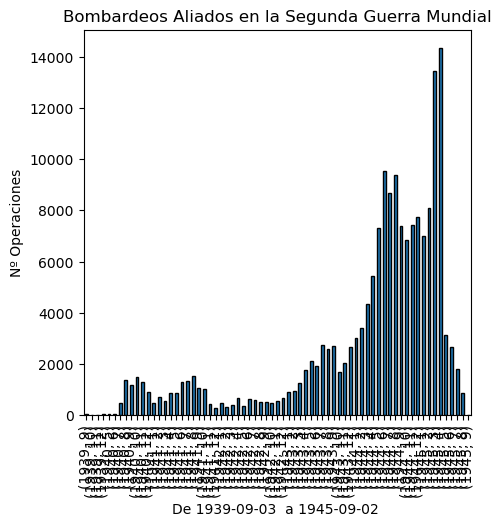

In [41]:
fun_crono(df_total)

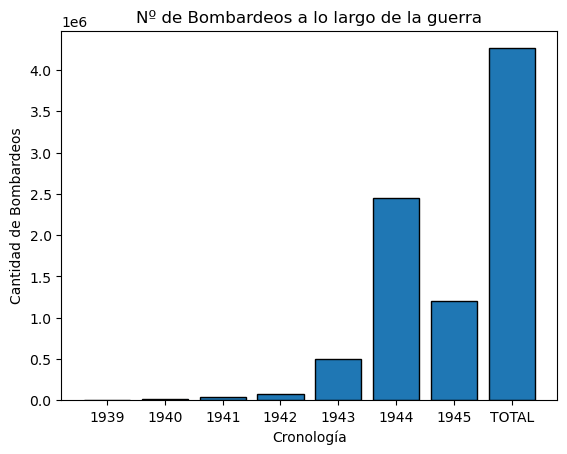

In [42]:
aa=int(sum(df_total_39["TOTAL_TONS"]))
bb=int(sum(df_total_40["TOTAL_TONS"]))
cc=int(sum(df_total_41["TOTAL_TONS"]))
dd=int(sum(df_total_42["TOTAL_TONS"]))
ee=int(sum(df_total_43["TOTAL_TONS"]))
ff=int(sum(df_total_44["TOTAL_TONS"]))
gg=int(sum(df_total_45["TOTAL_TONS"]))
hh=int(sum(df_total["TOTAL_TONS"]))

toneladas=[aa, bb, cc, dd, ee, ff, gg, hh]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]


plt.bar(años, toneladas, edgecolor='black')

plt.ylabel('Cantidad de Bombardeos')
plt.xlabel('Cronología')
plt.title("Nº de Bombardeos a lo largo de la guerra")
 
plt.show()

### +Operaciones aeromilitares a lo largo de cada Año

#### · Operaciones en 1939

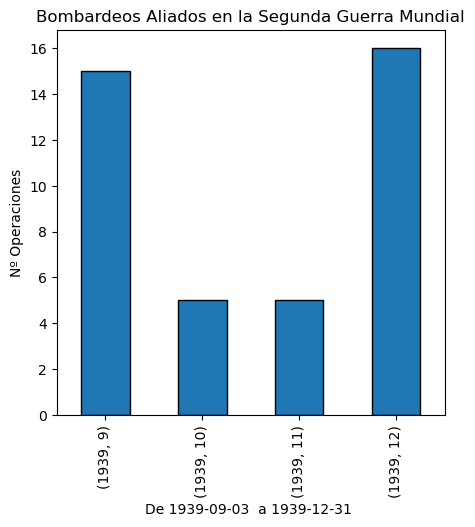

In [43]:
df_crono_39=fun_crono(df_total_39)

#### · Operaciones en 1940

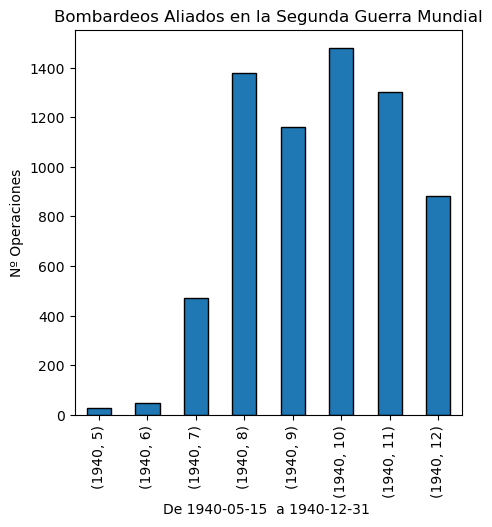

In [44]:
df_crono_40=fun_crono(df_total_40)

#### · Operaciones en 1941

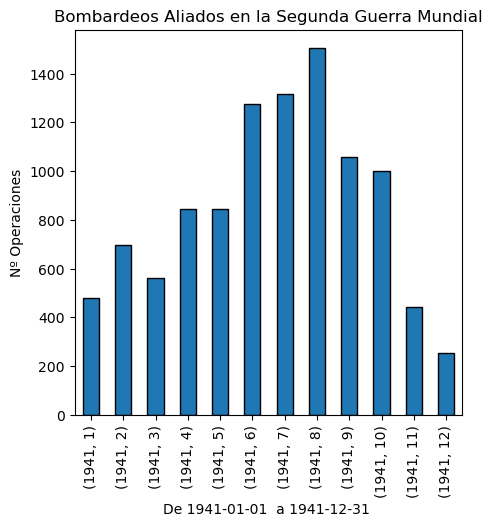

In [45]:
df_crono_41=fun_crono(df_total_41)

#### · Operaciones en 1942

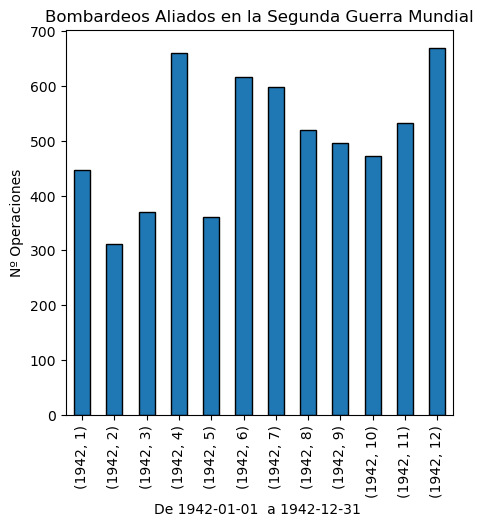

In [46]:
df_crono_42=fun_crono(df_total_42)

#### · Operaciones en 1943

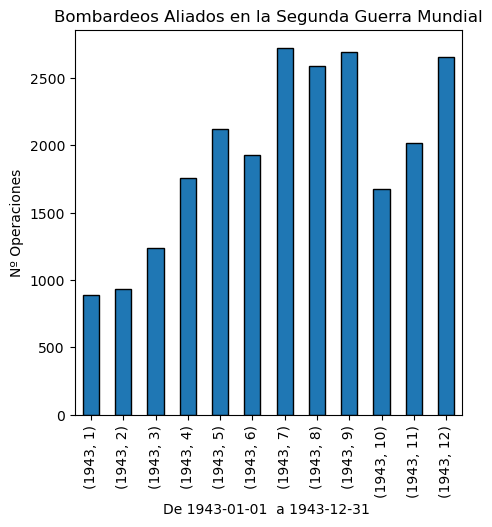

In [47]:
df_crono_43=fun_crono(df_total_43)

#### · Operaciones en 1944

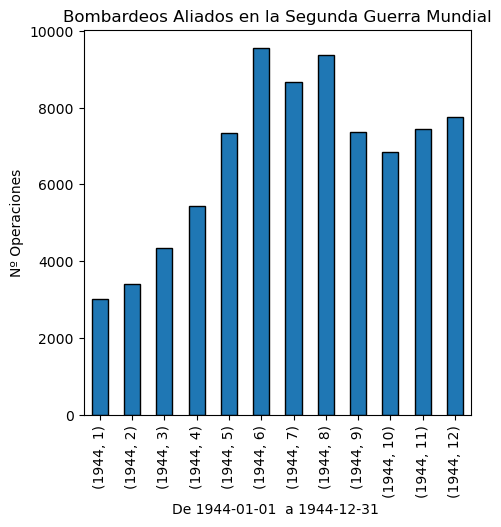

In [48]:
df_crono_44=fun_crono(df_total_44)

#### · Operaciones en 1945

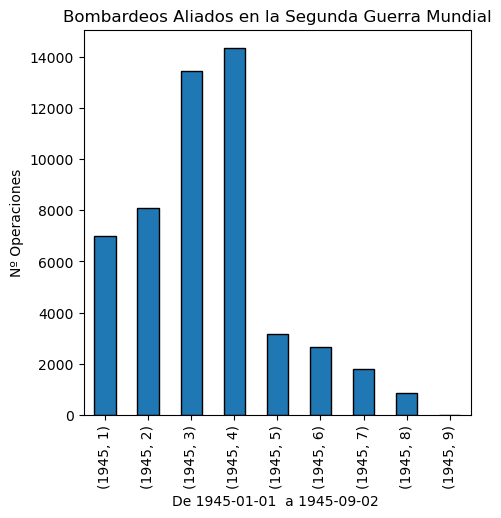

In [49]:
df_crono_45=fun_crono(df_total_45)

## >Fechas Destacadas

### +Fechas Destacadas

#### · Batalla de Francia (del 10 de mayo al 25 de junio de 1940)

In [50]:
df_total_Francia=fun_fechas(df_total, "1940-05-15", "1940-06-25")
df_total_Francia=fun_total_inglaterra(df_total_Francia)

#### · Batalla de Inglaterra (del 10 de julio al 31 de octubre de 1940)

In [51]:
df_total_Inglaterra=fun_fechas(df_total, "1940-07-10", "1940-10-31")
df_total_Inglaterra=fun_total_inglaterra(df_total_Inglaterra)

#### · Bombardeo de Colonia (del 30 al 31 de Mayo de 1942)

In [52]:
df_total_Colonia=fun_fechas(df_total, "1942-05-30", "1942-05-31")
df_total_Colonia=df_total_Colonia[df_total_Colonia["TGT_LOCATION"]=="COLOGNE"]

#### · Bombardeos de Hamburgo (del 24 de julio al 3 de agosto de 1943)

In [53]:
df_total_Hamburgo=fun_fechas(df_total, "1943-07-24", "1943-08-03")
df_total_Hamburgo=df_total_Hamburgo[df_total_Hamburgo["TGT_LOCATION"]=="HAMBURG"]

#### · Incidente de Charlie Brown y Franz Stigler (el 20 de diciembre de 1943)

In [54]:
df_total_Charlie=fun_fechas(df_total, "1943-12-20")
df_total_Charlie=df_total_Charlie[df_total_Charlie["TGT_LOCATION"]=="BREMEN"]

#### · Bombardeos de Wuhan (del 18 al 21 de diciembre de 1944)

In [55]:
df_total_Wuhan=fun_fechas(df_total, "1944-12-18", "1944-12-21")

#Por algún motivo, la localización de Wuhan no está referida como "WUHAN", sino como "HANKOW", "HANKON", "HAINAN ISLAND", "WUCHUANG" y "WUCHANG". Esto se puede comprobar por las coordenadas.
A=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKOW"]
B=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKON"]
C=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HAINAN ISLAND"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHUANG"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHANG"]
df_total_Wuhan = A.append([B,C,D])

df_total_Wuhan=df_total_Wuhan.sort_values(by='MSNDATE')

#### · Bombardeos de Dresde (del 13 al 15 de febrero de 1945)

In [56]:
df_total_Dresden=fun_fechas(df_total, "1945-02-13", "1945-02-15")
df_total_Dresden=df_total_Dresden[df_total_Dresden["TGT_LOCATION"]=="DRESDEN"]

#### · Bombardeos de Tokio (el 9 de marzo de 1945)

In [57]:
df_total_Tokyo=fun_fechas(df_total, "1945-03-09")
df_total_Tokyo=df_total_Tokyo[df_total_Tokyo["TGT_LOCATION"]=="TOKYO"]

#### · Bombardeos de Hiroshima y Nagasaki (del 6 y el 9 de agosto de 1945)

In [58]:
df_total_Hiroshima=fun_fechas(df_total, "1945-08-06")
df_total_Hiroshima=df_total_Hiroshima[df_total_Hiroshima["TGT_LOCATION"]=="HIROSHIMA"]

df_total_Nagasaki=fun_fechas(df_total, "1945-08-09")
df_total_Nagasaki=df_total_Nagasaki[df_total_Nagasaki["TGT_LOCATION"]=="NAGASAKI"]

## >Teatro de Operaciones más frecuente

### +Teatro de Operaciones más frecuentes, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='THEATER', ylabel='count'>

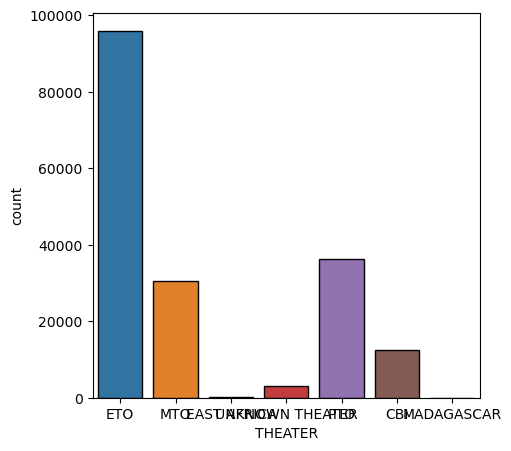

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(df_total["THEATER"], edgecolor='black')

### +Teatro de Operaciones más frecuente, según País Atacante, en Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

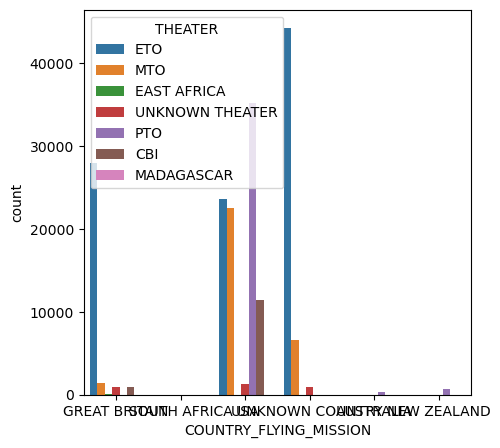

In [60]:
plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=(df_total))

### +Teatro de Operaciones más frecuente, según País Atacante, en 1945

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

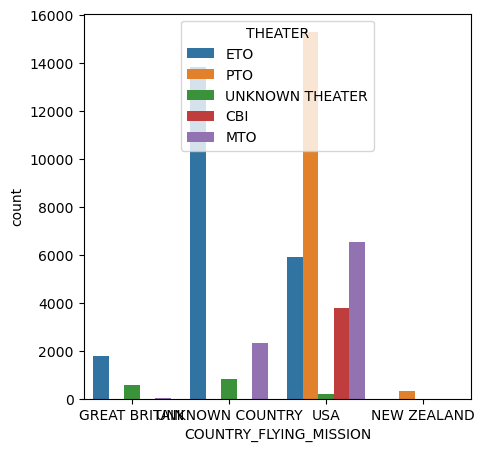

In [61]:
plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_45)

### +Teatro de Operaciones más frecente, según País Atacante, en Total, con ataques superiores a 100 y 800 de Daño Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

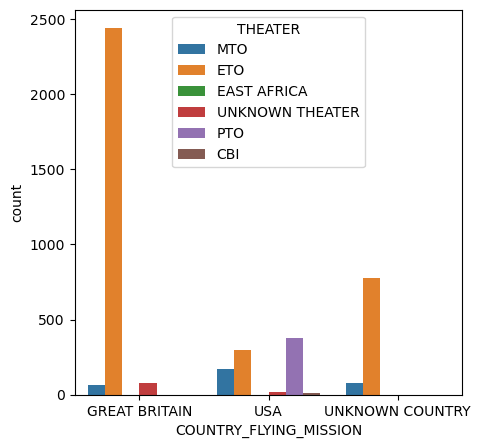

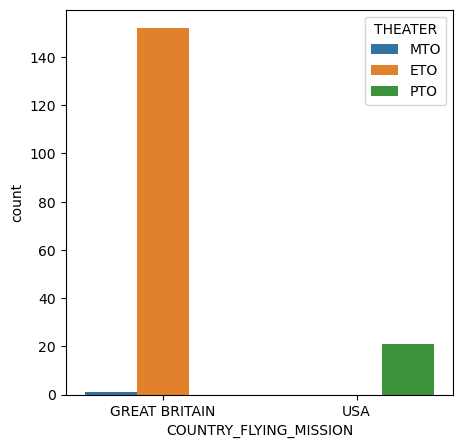

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>100])

plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>800])

## >Modelos de Avión más frecuentes

### +Modelos de Avión más frecuentes, en Total, particularizando los 10 más frecuentes

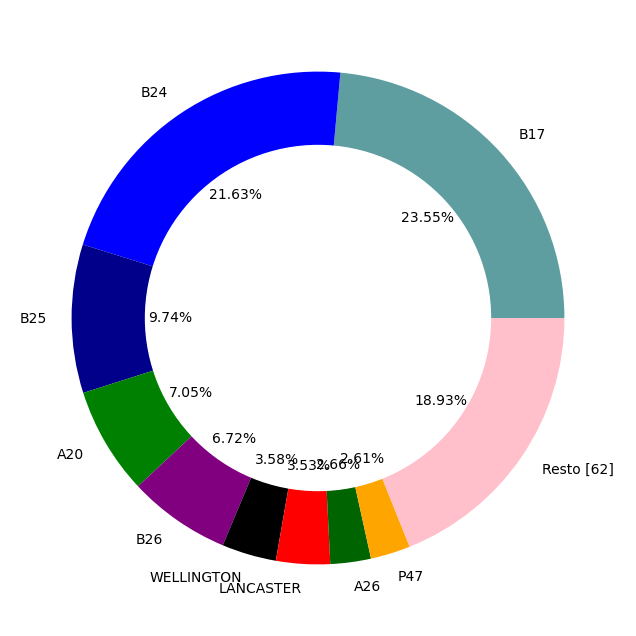

In [63]:
fun_modelos_avion(df_total, top=9, circulo=True)

### +Modelos de Avión más utilizados por Inglaterra en la Batalla de Inglaterra

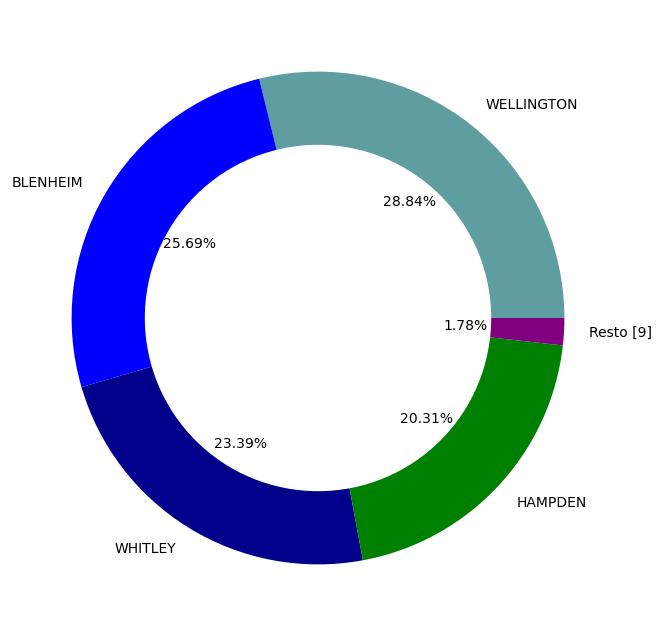

In [64]:
fun_modelos_avion(df_total_Inglaterra, top=4, circulo=True)

### +Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 400

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

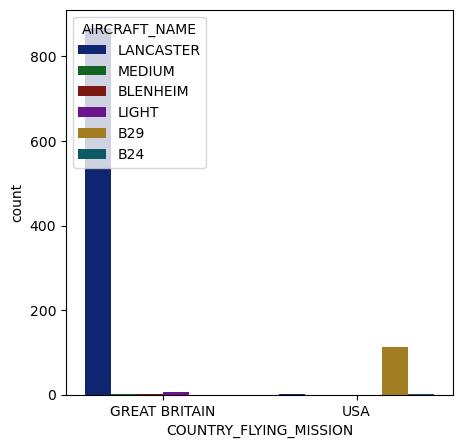

In [65]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>400]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

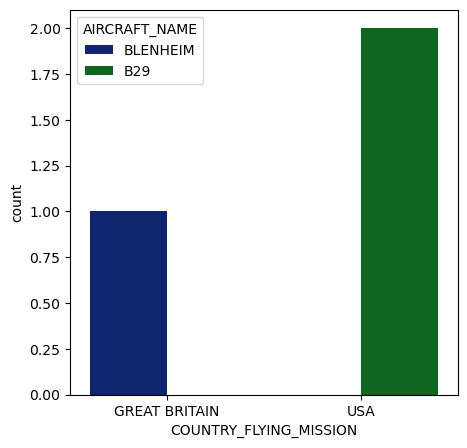

In [66]:
df_total_Tons_1000=df_total[df_total["TOTAL_TONS"]>1000]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_1000)

### +Detonaciones superiores a 990 Tonelada de Drestrucción Total

176


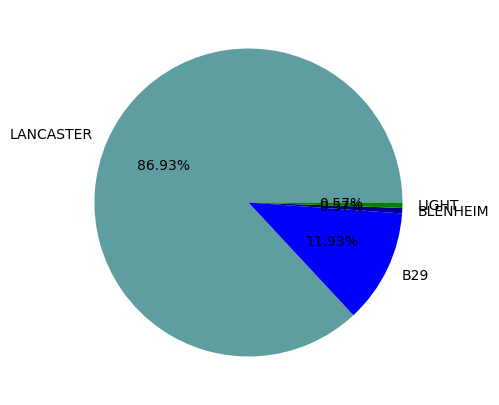

In [67]:
df_total_Tons_990=df_total[df_total["TOTAL_TONS"]>=800]
print (len(df_total_Tons_990))
fun_modelos_avion(df_total_Tons_990, x=5, y=5)

## >Destrucción Total

### +Destrucción Total a lo largo de toda la Guerra

<AxesSubplot:xlabel='MSNDATE'>

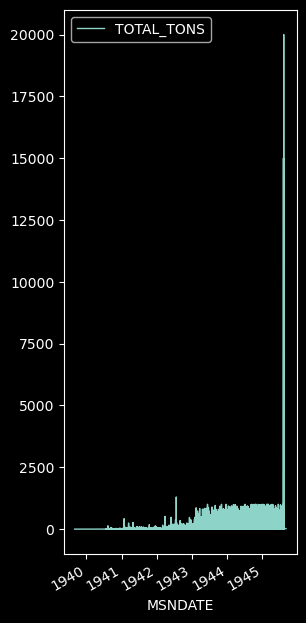

In [68]:
plt.style.use('dark_background')
c=df_total#[df_total["TOTAL_TONS"]<1000]  #<---Si queremos eliminar las operaciones ultradestructivas
c.plot.line(y='TOTAL_TONS',figsize=(3,8),lw=1)

### +Distribución de la Destrucción Total, en Total

<AxesSubplot:ylabel='Density'>

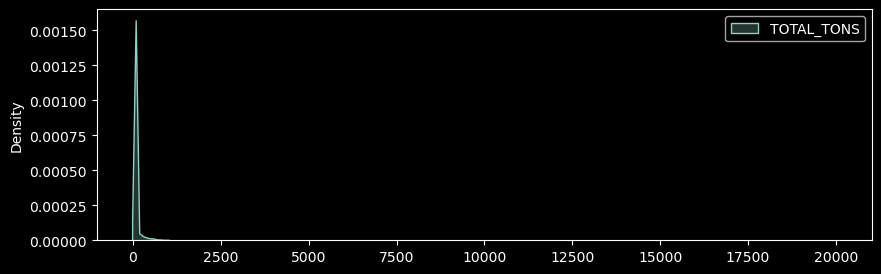

In [69]:
s=df_total.drop(['TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)
plt.style.use("dark_background")
plt.figure(figsize=(10,3))
sns.kdeplot(data=s[s.columns.values], shade=True)

### +Destrucción Total, en Total, según Países Atacados

<Figure size 100x100 with 0 Axes>

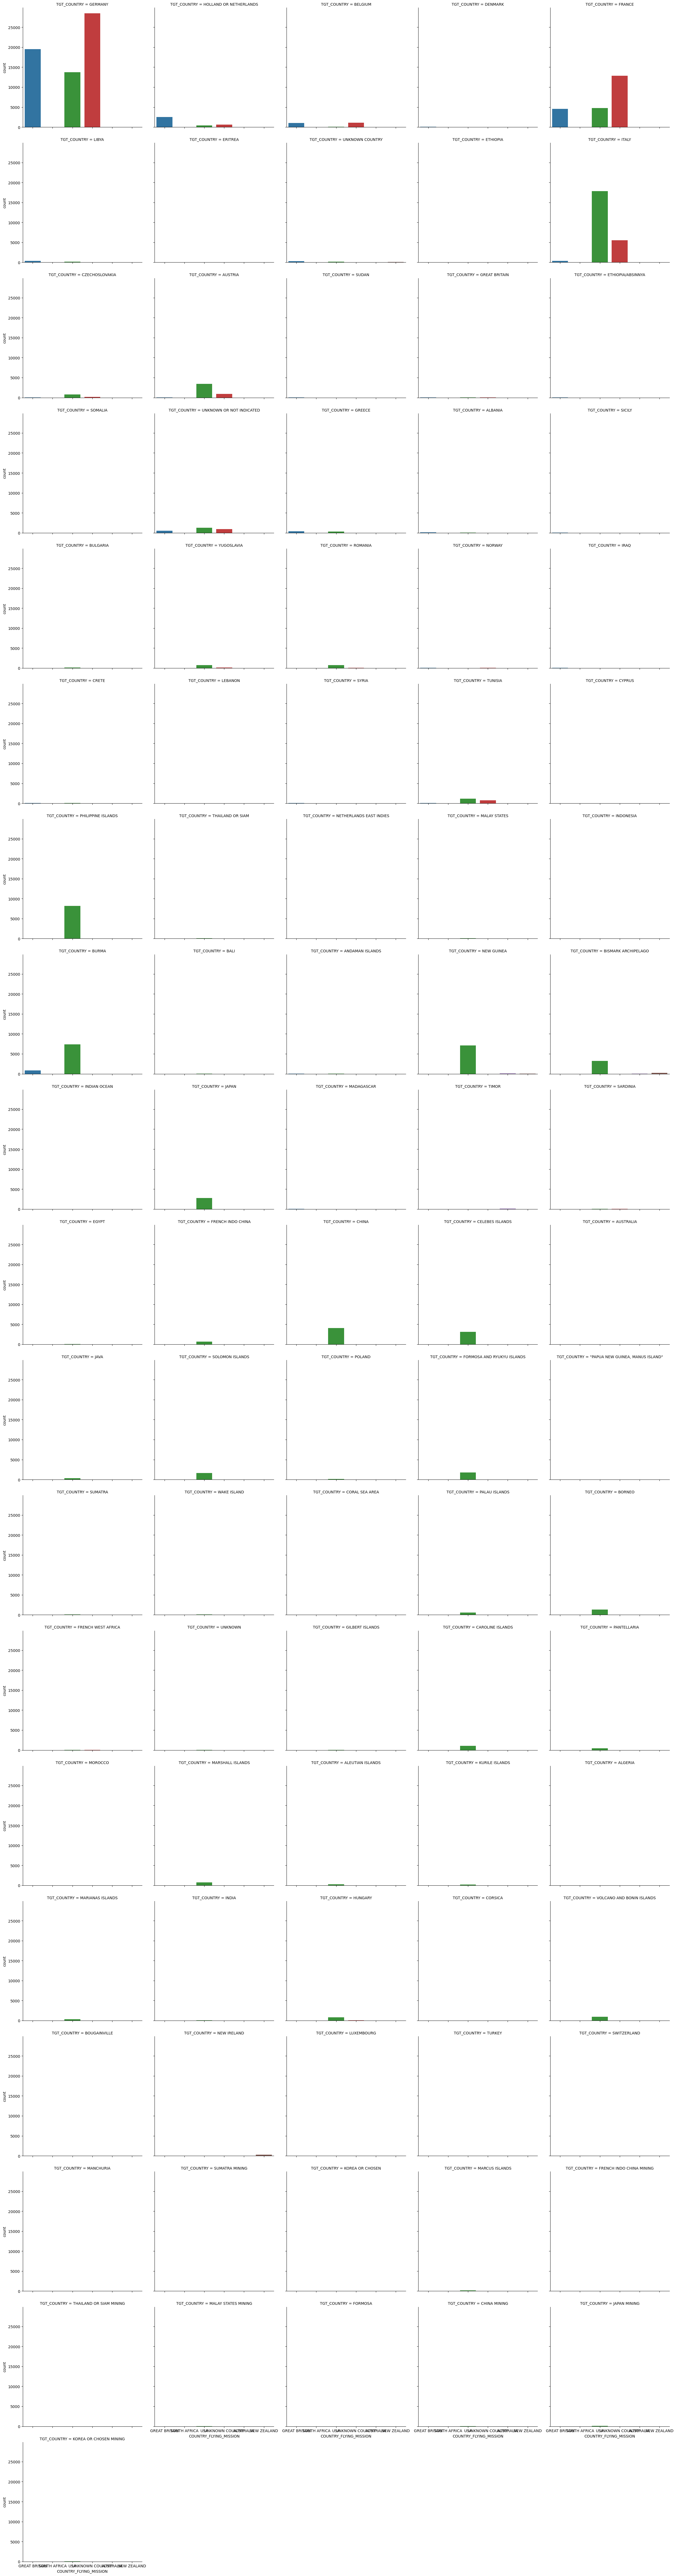

In [70]:
plt.style.use("default")
plt.figure(figsize=(1,1))
sns.catplot(x = "COUNTRY_FLYING_MISSION",
col = "TGT_COUNTRY",
col_wrap = 5,
data = df_total,
label= x,
kind = "count");

### +Media de la Destrucción Total (los 10 mayores), en Total, según los Modelos de Avión

#### · Según Modelos de Avión con mayor media

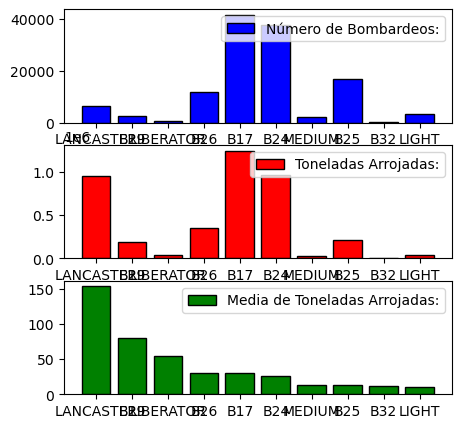

In [71]:
fun_uso_aviones (df_total, top=10, media=True, tons=1)

#### · Según Modelos de Avión más frecuentes

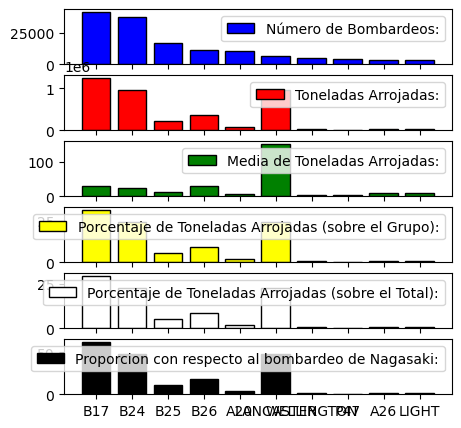

In [72]:
fun_uso_aviones (df_total, top=10, extra=True, tons=1)

### +Relación entre las Toneladas Arrojadas, y el número de unidades dentro de cada operación

<AxesSubplot:xlabel='AC_ATTACKING', ylabel='TOTAL_TONS'>

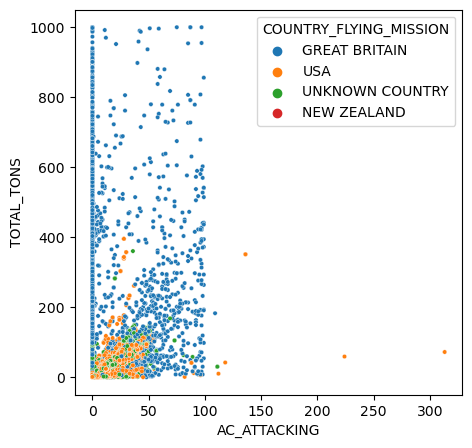

In [73]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_total_44["AC_ATTACKING"],
                y=df_total_44["TOTAL_TONS"],
                s=10,
                hue=df_total_44["COUNTRY_FLYING_MISSION"])

# OTROS

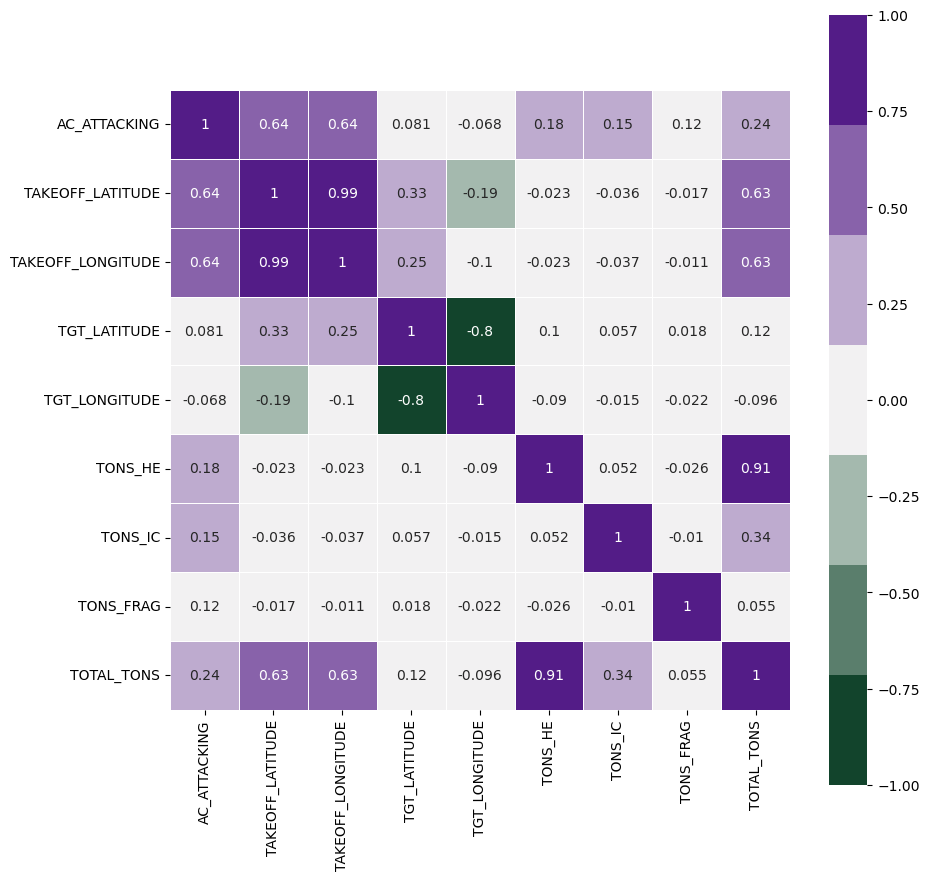

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(df_total.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

<AxesSubplot:xlabel='TGT_COUNTRY,COUNTRY_FLYING_MISSION'>

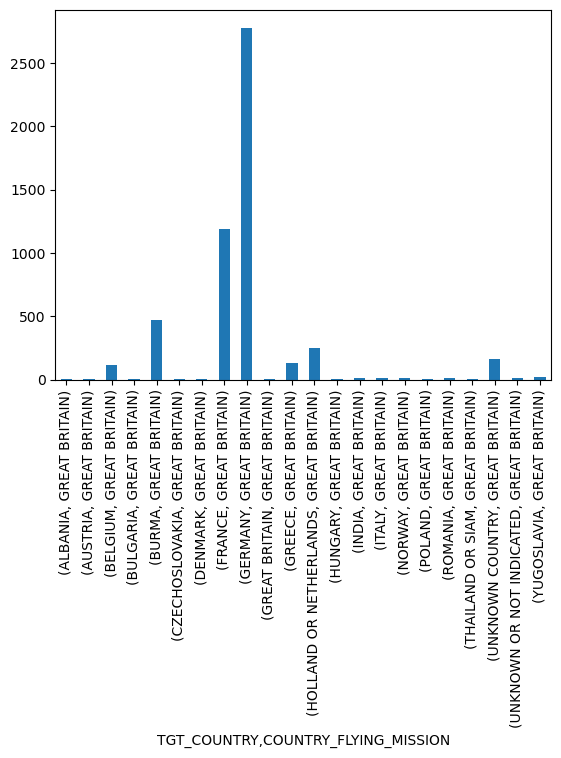

In [75]:
#Número de combinaciones entre Reino Unido y los Países Atacados
xxx=df_total_44[df_total_44["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]

groups = xxx.groupby(['TGT_COUNTRY','COUNTRY_FLYING_MISSION']).size()
groups.plot.bar()

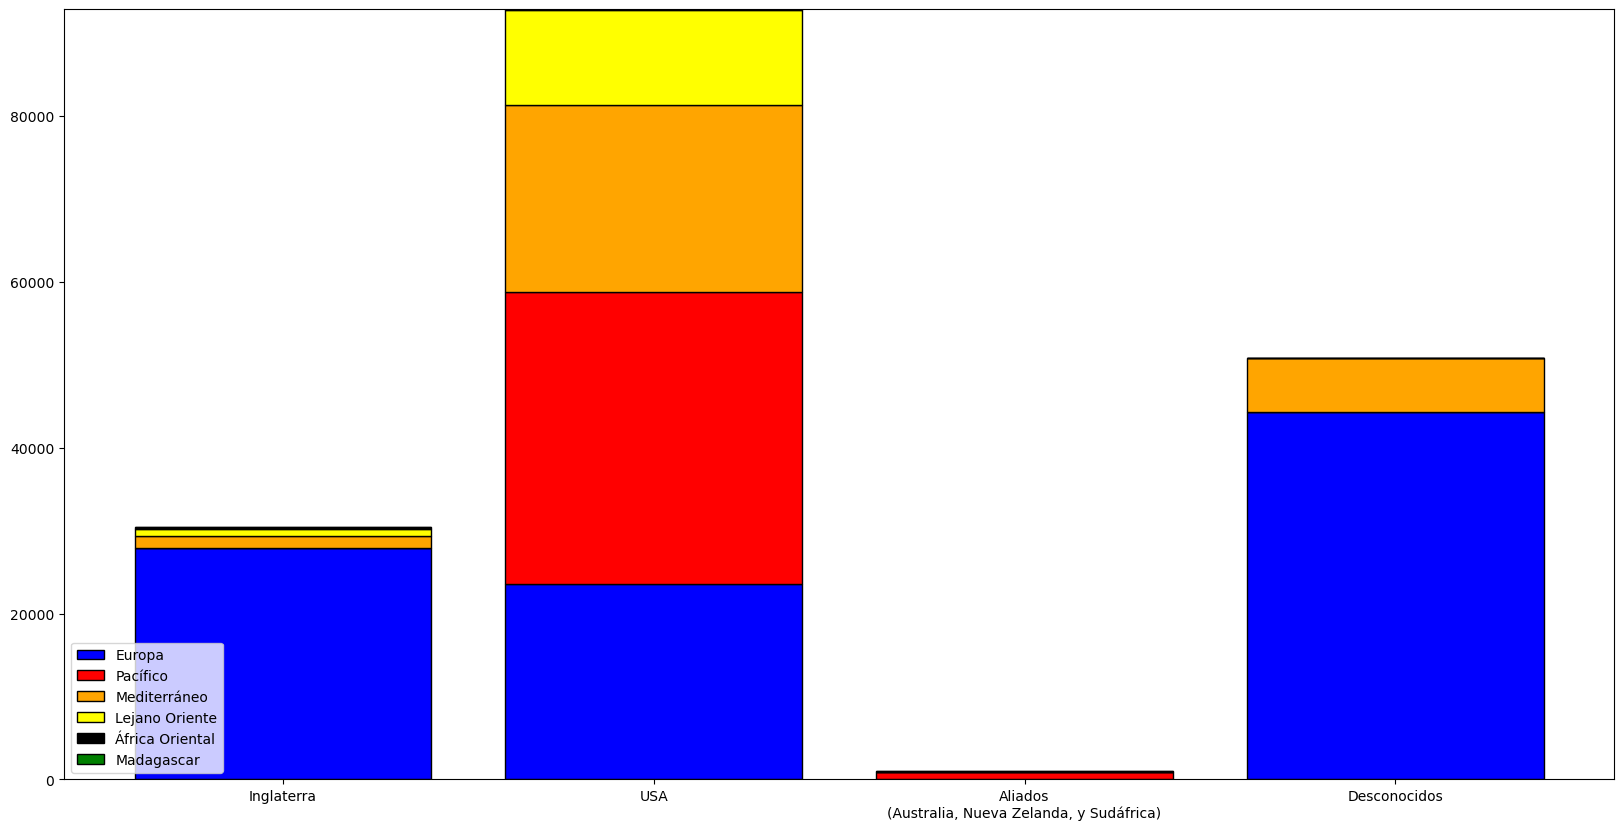

In [76]:
fun_uso_paises (df_total, desconocidos=True, save="F")

In [77]:
#Estos son los diferentes colores disponibles:
("black","gray", "cadetblue","darkblue","darkpurple",
 "blue","purple", "orange", "red","darkred","darkgreen",
 "green","lightgray", "pink","lightred","beige","lightblue","lightgreen","white")

('black',
 'gray',
 'cadetblue',
 'darkblue',
 'darkpurple',
 'blue',
 'purple',
 'orange',
 'red',
 'darkred',
 'darkgreen',
 'green',
 'lightgray',
 'pink',
 'lightred',
 'beige',
 'lightblue',
 'lightgreen',
 'white')

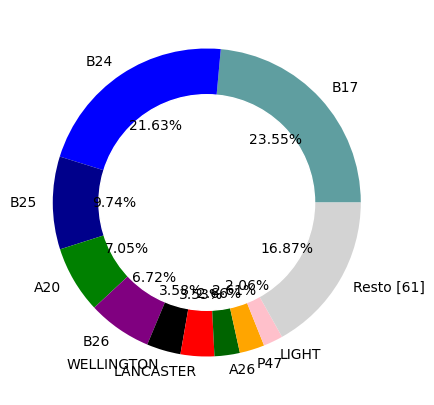

In [78]:
fun_modelos_avion(df_total, style=11, circulo=True, top=10, x=5, y=5)

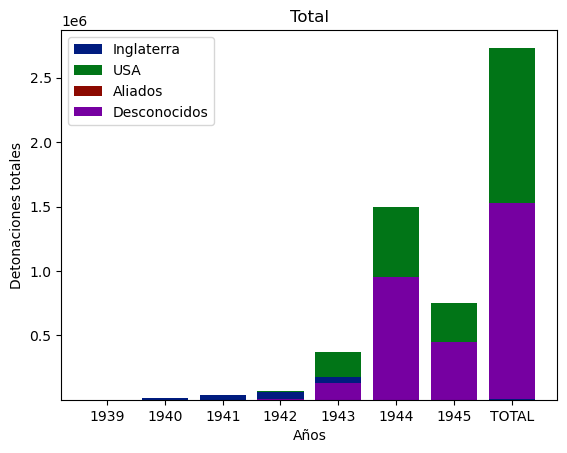

In [79]:
#Ideal para la acción de cada país en cada año

lista_suprema=[df_total_39, df_total_40, df_total_41, df_total_42, df_total_43, df_total_44, df_total_45, df_total]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]
inglaterra=[]
usa=[]
aliados=[]
desconocidos=[]

for i in lista_suprema:
    a=int(sum((fun_total_inglaterra(i))["TOTAL_TONS"]))
    b=int(sum((fun_total_usa(i))["TOTAL_TONS"]))
    c=int(sum((fun_total_aliados(i))["TOTAL_TONS"]))
    d=int(sum((fun_total_desconocidos(i))["TOTAL_TONS"]))
    inglaterra.append(a)
    usa.append(b)
    aliados.append(c)
    desconocidos.append(d)

indice = np.arange(len(años))
 
plt.bar(indice, inglaterra, label='Inglaterra')
plt.bar(indice, usa, label='USA',  bottom=inglaterra)
plt.bar(indice, aliados, label='Aliados',  bottom=usa)
plt.bar(indice, desconocidos, label='Desconocidos',  bottom=aliados)
 
plt.xticks(indice, años)
plt.ylabel("Detonaciones totales")
plt.xlabel("Años")
plt.title('Total')
plt.legend()
 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

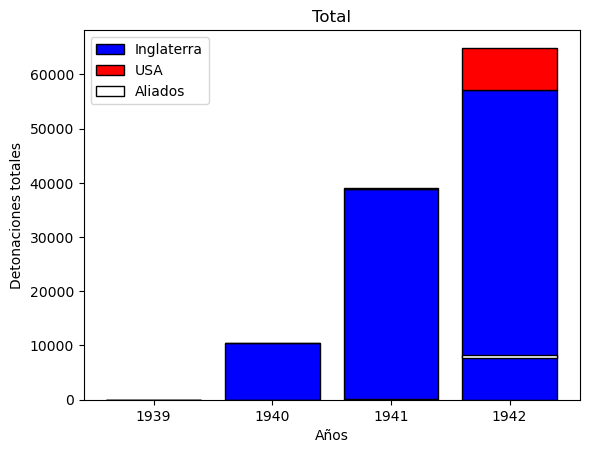

In [80]:
#Ideal para la acción de cada país en cada año

lista_suprema=[df_total_39, df_total_40, df_total_41, df_total_42]
años=["1939", "1940", "1941", "1942"]
inglaterra=[]
usa=[]
aliados=[]
desconocidos=[]

for i in lista_suprema:
    a=int(sum((fun_total_inglaterra(i))["TOTAL_TONS"]))
    b=int(sum((fun_total_usa(i))["TOTAL_TONS"]))
    c=int(sum((fun_total_aliados(i))["TOTAL_TONS"]))
    inglaterra.append(a)
    usa.append(b)
    aliados.append(c)

indice = np.arange(len(años))
 

plt.bar(indice, inglaterra, label='Inglaterra',  color="blue", edgecolor='black')
plt.bar(indice, usa, label='USA',  bottom=inglaterra,  color="red", edgecolor='black')
plt.bar(indice, aliados, label='Aliados',  bottom=usa,  color="white", edgecolor='black')

 
plt.xticks(indice, años)
plt.ylabel("Detonaciones totales")
plt.xlabel("Años")
plt.title('Total')
plt.legend()
 
plt.show#savefig("Total de Toneladas Arrojadas entre 1939 y finales de 1942")#show()

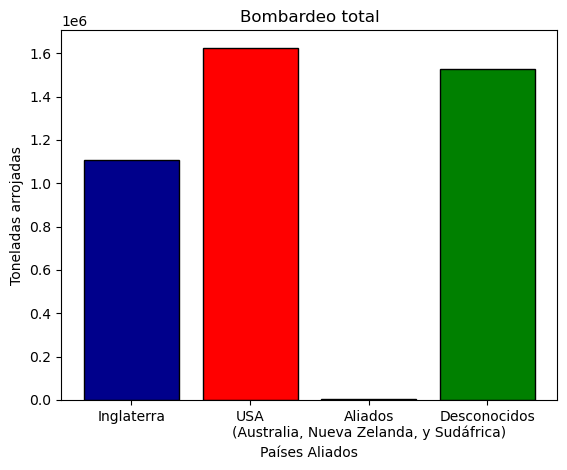

In [81]:
fun_suma_tons (df_total, desconocidos=True)

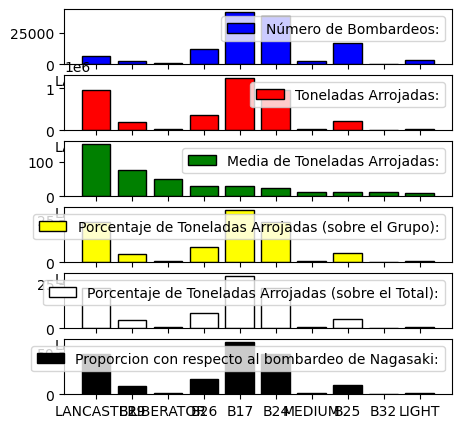

In [82]:
fun_uso_aviones (df_total, top=10, media=True, extra=True)

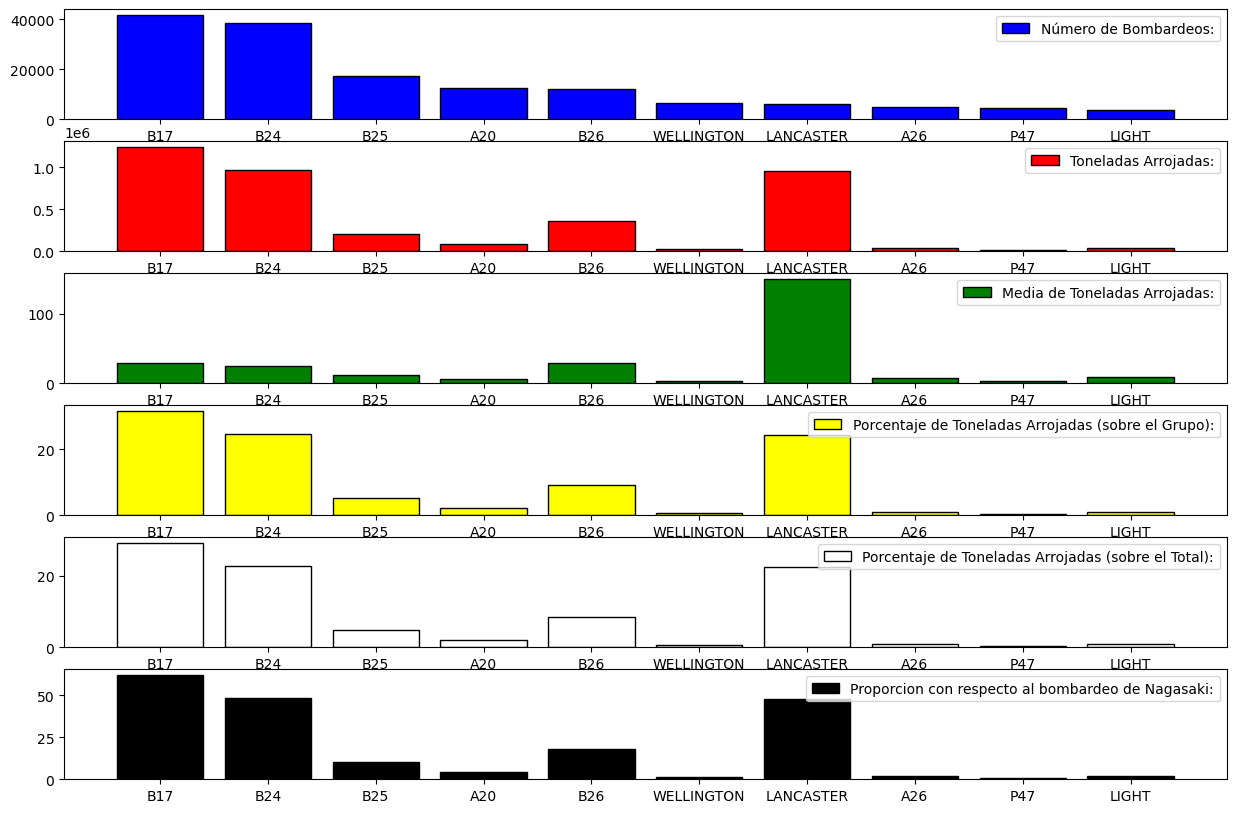

In [83]:
fun_uso_aviones (df_total, top=15, x=15, y=10, extra=True)

Nombre del Modelo: B17
·Pais más común: USA
·Teatro más común: ETO 
·Número de Bombardeos: 41973
·Toneladas Arrojadas: 1248099.66 
·Media de Toneladas Arrojadas: 29.736 

Nombre del Modelo: LANCASTER
·Pais más común: GREAT BRITAIN
·Teatro más común: ETO 
·Número de Bombardeos: 6298
·Toneladas Arrojadas: 953399.0 
·Media de Toneladas Arrojadas: 151.381 

Nombre del Modelo: LIBERATOR
·Pais más común: GREAT BRITAIN
·Teatro más común: MTO 
·Número de Bombardeos: 769
·Toneladas Arrojadas: 37885.82 
·Media de Toneladas Arrojadas: 49.266 

Nombre del Modelo: WHITLEY
·Pais más común: GREAT BRITAIN
·Teatro más común: ETO 
·Número de Bombardeos: 3205
·Toneladas Arrojadas: 8830.0 
·Media de Toneladas Arrojadas: 2.755 



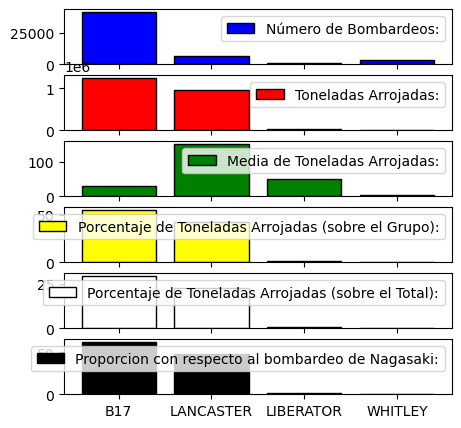

In [84]:
fun_uso_avion (df_total, "B17", "LaNCASTER", "LIBERATOR", "WHITLEY", info=True, extra=True)

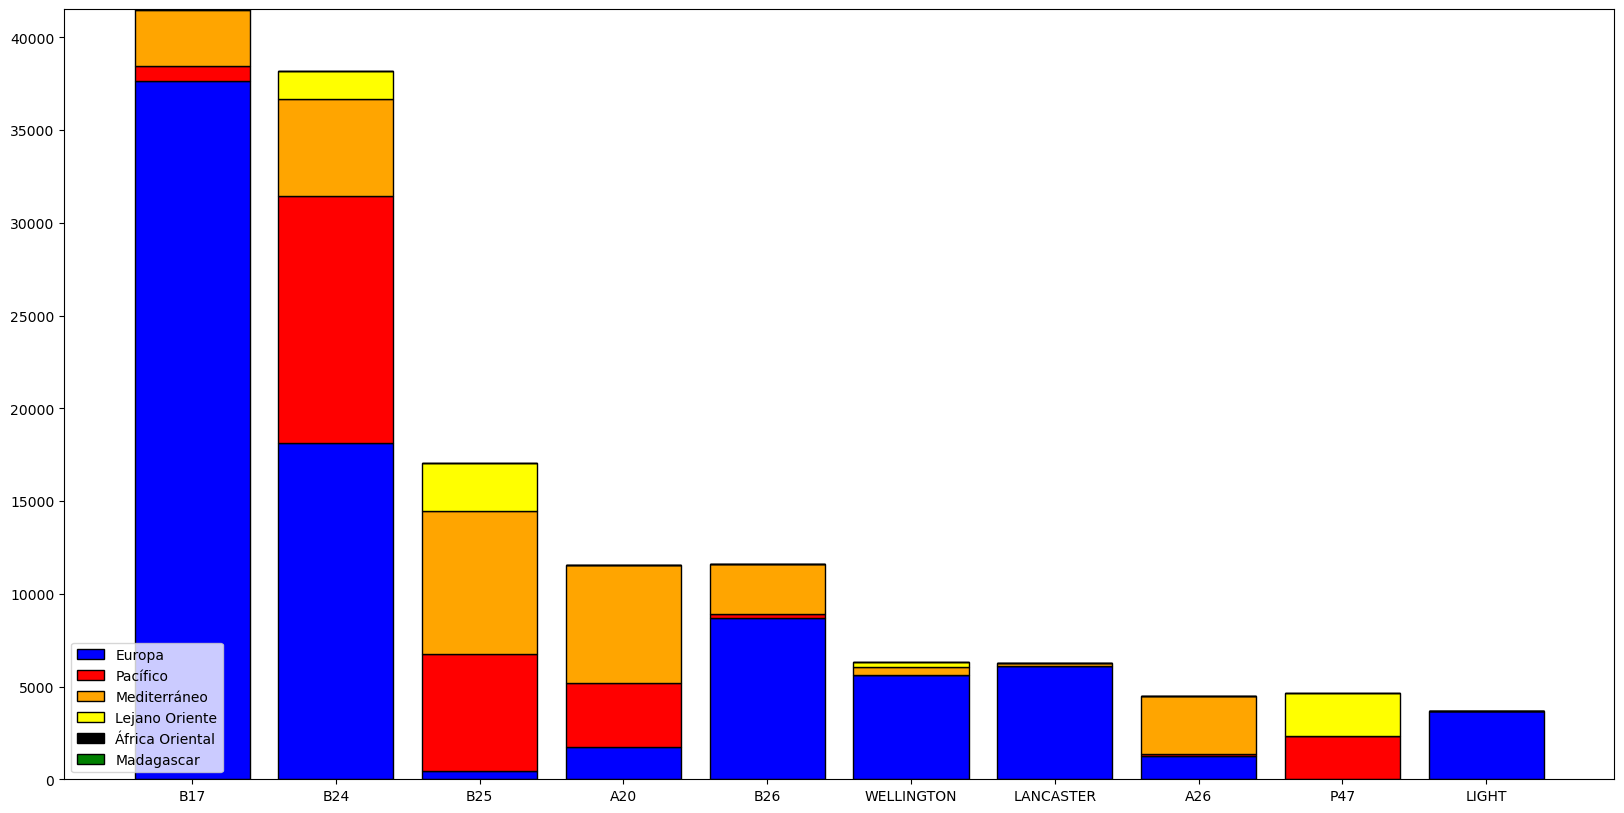

In [85]:
fun_uso_avion_teatro (df_total, 'B17', 'B24', 'B25', 'A20', 'B26', 'WELLINGTON', 'LANCASTER', 'A26', 'P47', 'LIGHT', x=20, y=10, save="Los 10 Bombarderos más frecuentes, con respecto a los Teatros")

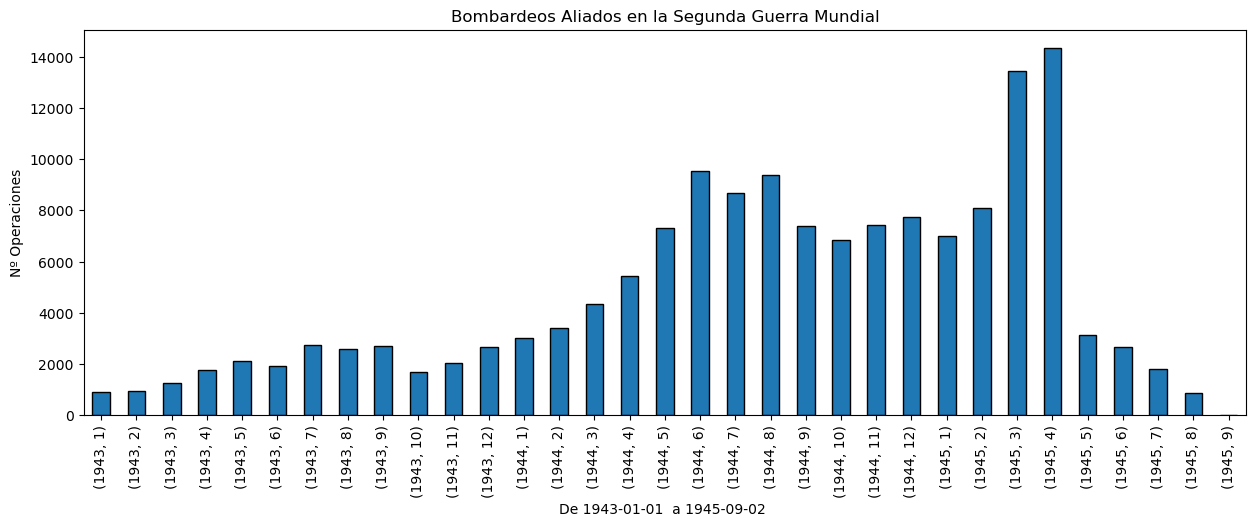

In [86]:
fun_crono (fun_fechas(df_total, "1943", "1945"), x=15, save="Número de Bombardeos entre 1943 y el final de la guerra")

In [87]:
fun_gps2(fun_fechas(fun_total_mediterraneo(df_total), "1942"),  x=25, y=32, z=7, multiplicador=20, tons=0)

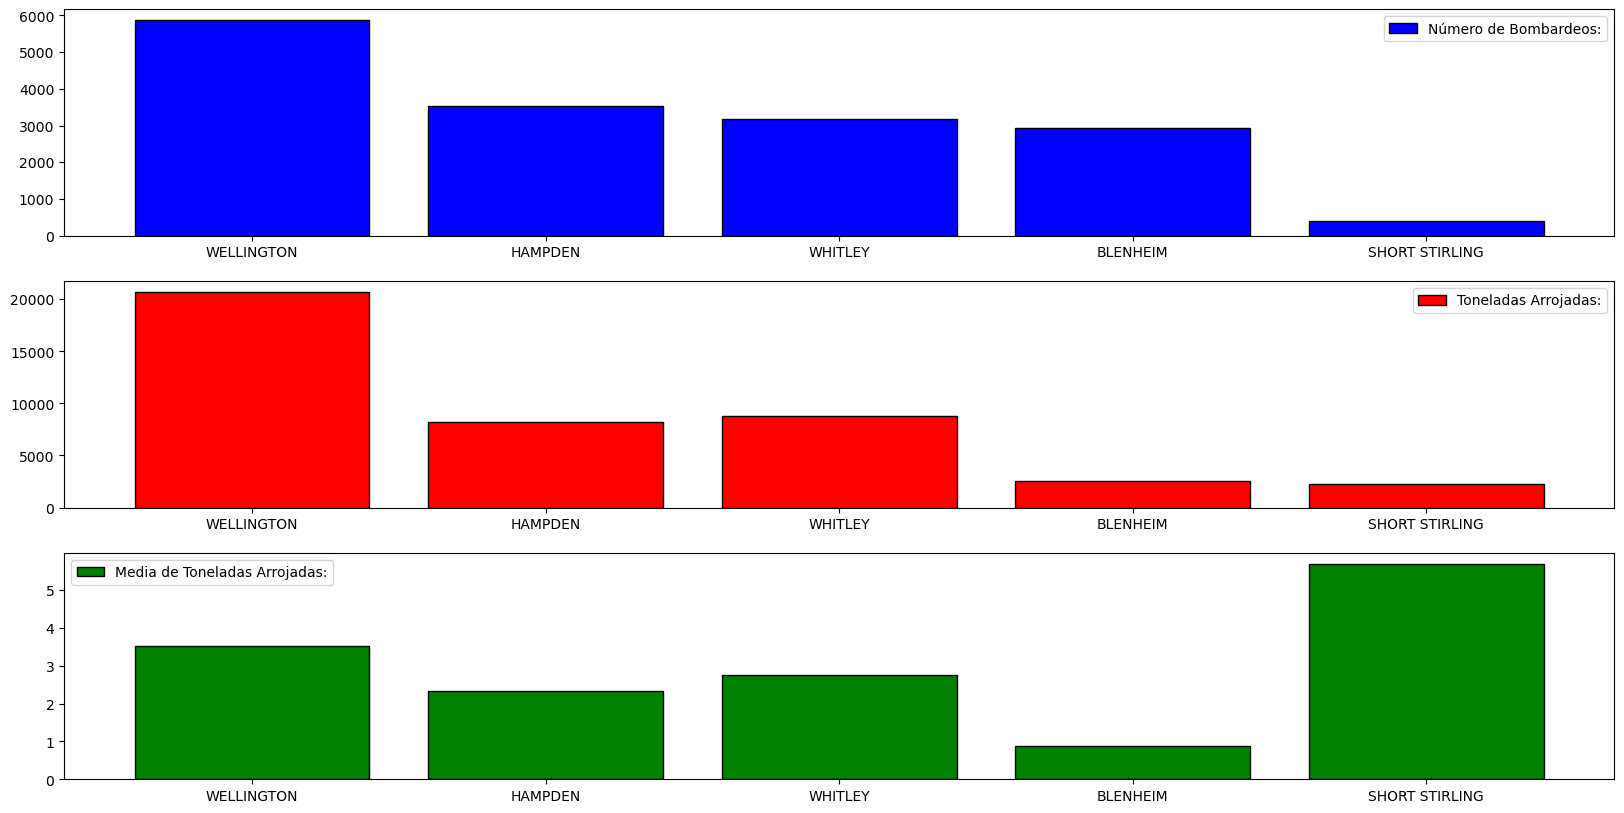

In [88]:
fun_uso_aviones (fun_total_inglaterra(fun_fechas(df_total, "1939", "1941-12-31")), top=5, extra=False, x=20, y=10, save="Estadísticas de Aviones ingleses de 1939 hasta 1941")

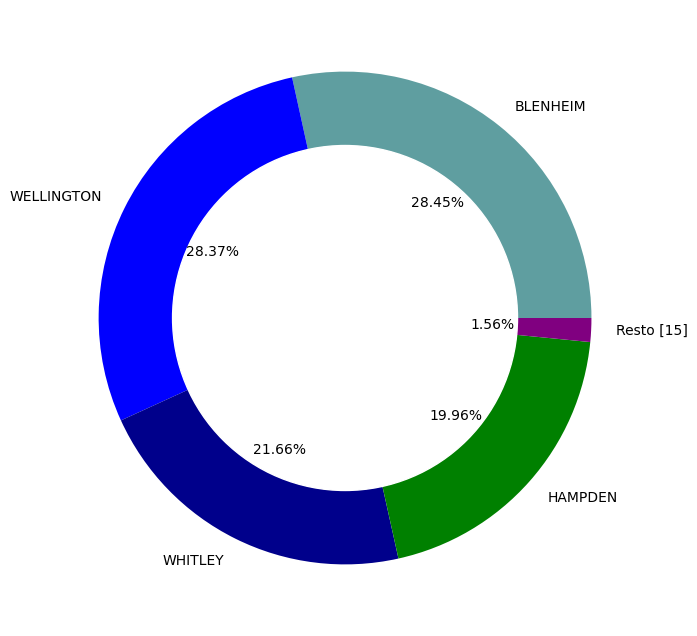

In [89]:
fun_modelos_avion (df_total_40, top=4, circulo=True)

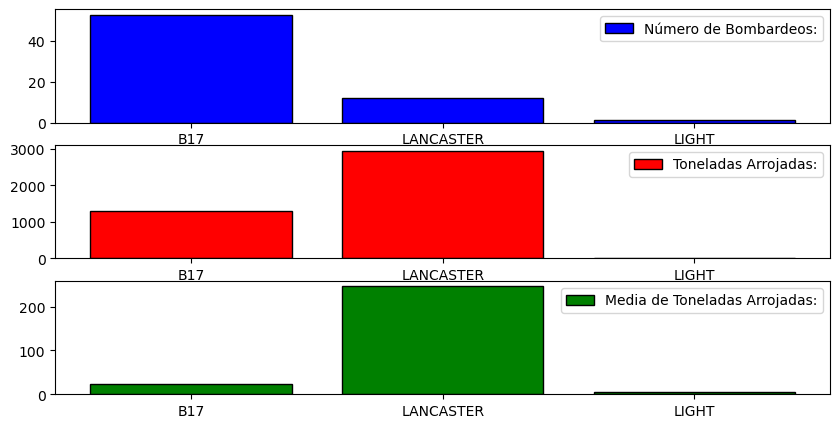

In [90]:
fun_uso_aviones(df_total_Dresden, extra=False, x=10, y=5, save="Uso de los aviones en Dresde")